In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hr_data = pd.read_csv('HR_comma_sep.csv')

In [3]:
hr_data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
hr_data['salary'].replace('low', 1, inplace = True)
hr_data['salary'].replace('medium', 2, inplace = True)
hr_data['salary'].replace('high', 3, inplace = True)
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


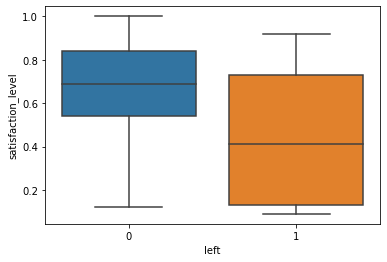

In [6]:
plot = sns.boxplot(y = hr_data['satisfaction_level'], x = hr_data['left'])

In [7]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']

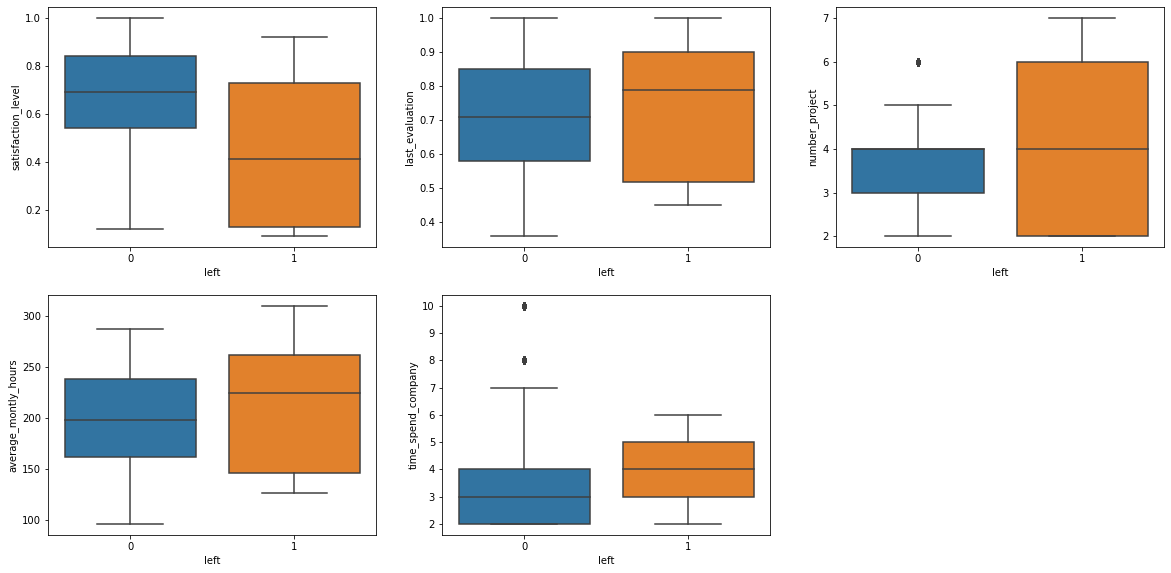

In [9]:
plt.figure(figsize=(20,15))
for i, col in enumerate(features):
    plt.subplot(3, 3,i+1)
    plot = sns.boxplot(y = col, x = 'left', data = hr_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

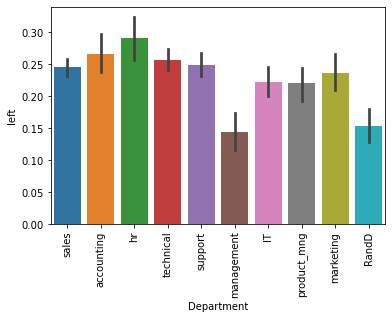

In [10]:
sns.barplot(x = hr_data['Department'], y = hr_data['left'])
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='salary', ylabel='left'>

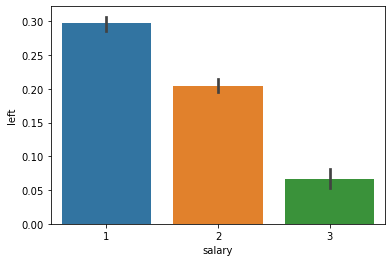

In [11]:
sns.barplot(x = hr_data['salary'], y = hr_data['left'])


<AxesSubplot:xlabel='Work_accident', ylabel='left'>

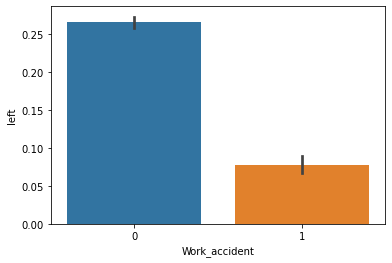

In [12]:
sns.barplot(x = hr_data['Work_accident'], y = hr_data['left'])

<AxesSubplot:xlabel='number_project', ylabel='left'>

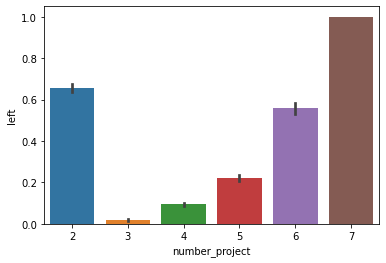

In [13]:
sns.barplot(x = hr_data['number_project'], y = hr_data['left'])


<AxesSubplot:xlabel='promotion_last_5years', ylabel='left'>

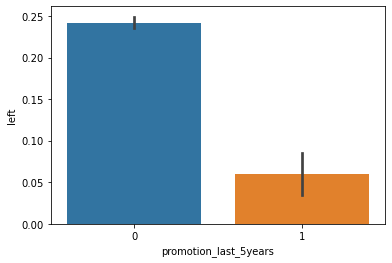

In [14]:
sns.barplot(x = hr_data['promotion_last_5years'], y = hr_data['left'])

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

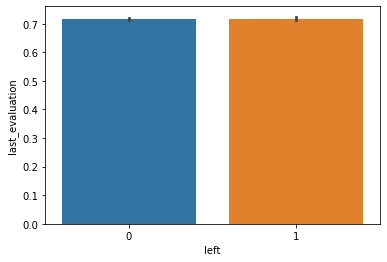

In [15]:
sns.barplot(y = hr_data['last_evaluation'] ,x = hr_data['left'])

In [16]:
X = hr_data[['satisfaction_level', 'number_project',
             'average_montly_hours', 'time_spend_company', 'salary', 'promotion_last_5years','Work_accident']]
y = hr_data['left']
X.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,salary,promotion_last_5years,Work_accident
0,0.38,2,157,3,1,0,0
1,0.80,5,262,6,2,0,0
2,0.11,7,272,4,2,0,0
3,0.72,5,223,5,1,0,0
4,0.37,2,159,3,1,0,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
len(X_test)

3000

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
pred = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2312
           1       0.62      0.40      0.48       688

    accuracy                           0.81      3000
   macro avg       0.73      0.66      0.68      3000
weighted avg       0.79      0.81      0.79      3000



In [22]:
model.score(X_test, y_test)

0.8063333333333333